# Yearly Bayesian Updating Simulation (Weekdays Only)
This notebook simulates a production-like environment where thousands of claims arrive each weekday over a year.
We apply Bayesian updating daily to track how the posterior recovery probability evolves.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta

np.random.seed(42)

def update_beta(alpha, beta_param, recoveries):
    """Update Beta distribution parameters given binary recoveries (1=recovered, 0=default)."""
    alpha_new = alpha + np.sum(recoveries)
    beta_new = beta_param + len(recoveries) - np.sum(recoveries)
    return alpha_new, beta_new

## Simulate One Year of Weekday Claims
We assume a true recovery rate and simulate thousands of claims per weekday (Mon–Fri).

In [2]:
# Simulation settings
start_date = '2025-01-01'
end_date = '2025-12-31'
true_recovery_rate = 0.65
claims_per_day = 3000  # thousands of claims per weekday

dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Prior parameters
alpha, beta_param = 2.0, 2.0

posterior_means = []
posterior_dates = []

for current_date in dates:
    if current_date.weekday() < 5:  # 0=Mon, 4=Fri
        daily_claims = np.random.binomial(1, true_recovery_rate, size=claims_per_day)
        alpha, beta_param = update_beta(alpha, beta_param, daily_claims)
        mean = alpha / (alpha + beta_param)
        posterior_means.append(mean)
        posterior_dates.append(current_date)

len(posterior_means), posterior_means[:5]

(261,
 [0.6468042609853528,
  0.6537308461025982,
  0.6607063527321191,
  0.6569476841052982,
  0.6558917621967475])

## Plot Posterior Mean Over the Year
As more data arrives, the posterior mean should stabilize near the true recovery rate.

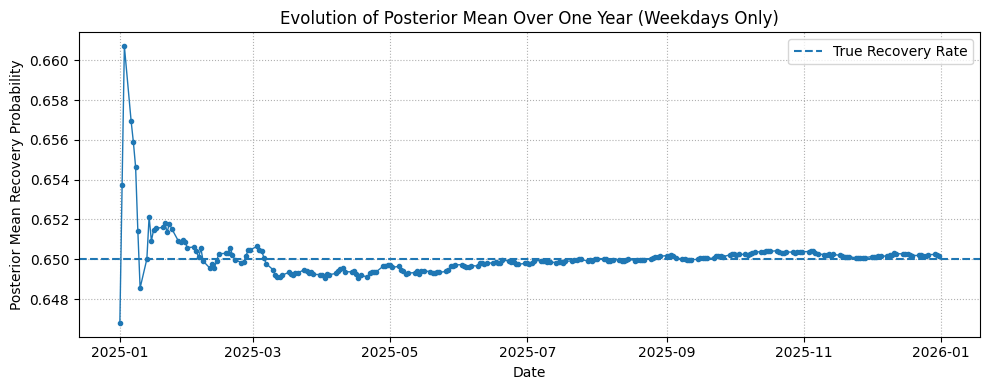

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(posterior_dates, posterior_means, marker='.', linewidth=1)
plt.axhline(true_recovery_rate, linestyle='--', label='True Recovery Rate')
plt.xlabel('Date')
plt.ylabel('Posterior Mean Recovery Probability')
plt.title('Evolution of Posterior Mean Over One Year (Weekdays Only)')
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

## Interpretation
- With thousands of claims per weekday, the posterior mean converges quickly toward the true recovery rate.
- Early in the year, the prior still has some influence, but it is quickly overwhelmed by the volume of data.
- Later in the year, new data only nudges the posterior slightly, reflecting high confidence in the estimate.
- This mirrors a live production environment where large claim volumes make the recovery estimate very stable.